In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data=pd.read_csv("column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
data['class'].nunique()

2

In [6]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
Class_a=data[data['class']=='Abnormal'] 
Class_b=data[data['class']!='Abnormal'] 

In [8]:
#we have a 210 example in class a and 100 in class b....
print(Class_a.shape)
print(Class_b.shape)

(210, 7)
(100, 7)


In [9]:
dis={"Abnormal":1,"Normal":0}
data['class']=data['class'].map(dis)

In [10]:
sc=StandardScaler()

In [11]:
sc.fit(data.drop('class',axis=1))


StandardScaler()

In [12]:
scaled_data=sc.transform(data.drop('class',axis=1))

In [13]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


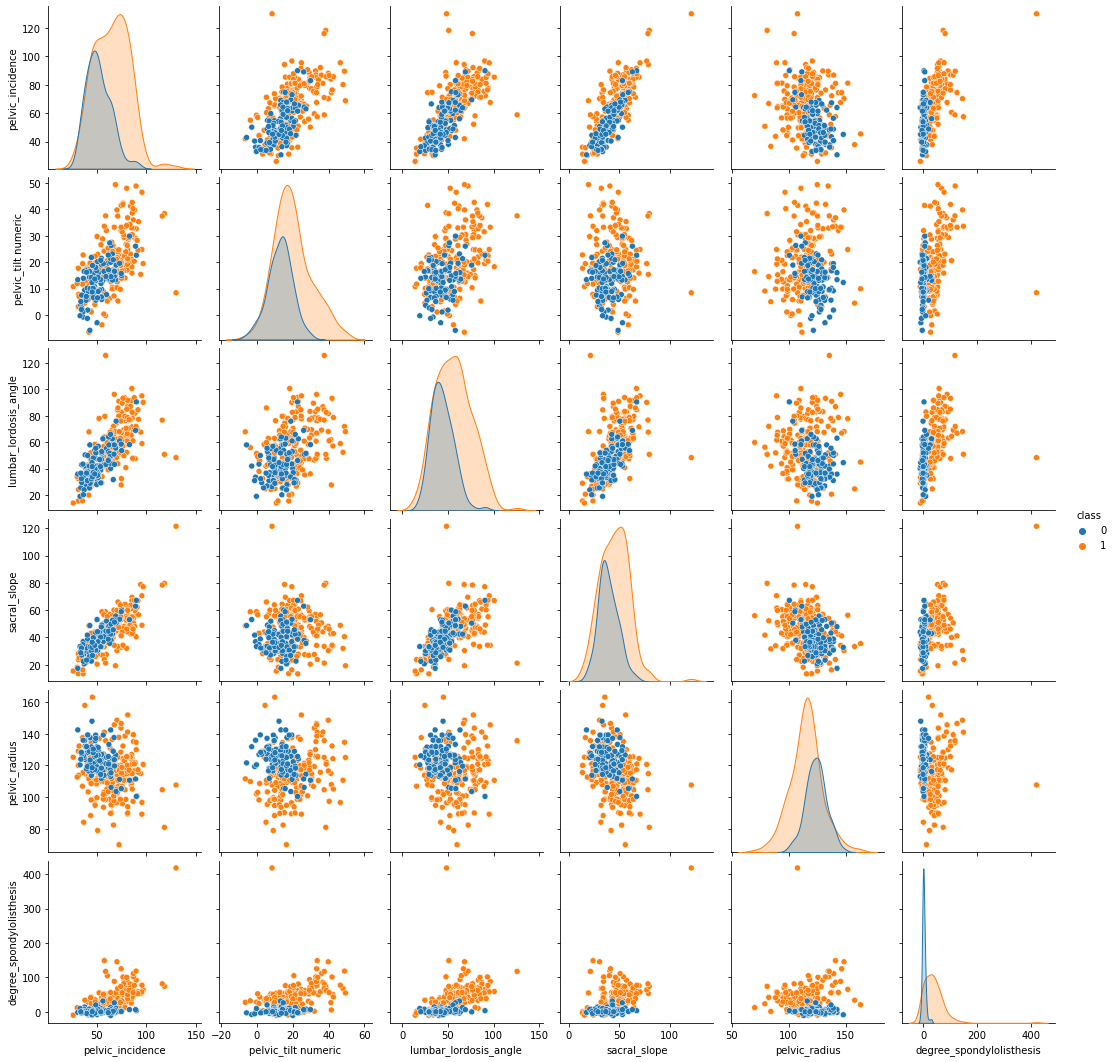

In [14]:
sns.pairplot(data,hue='class')

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,data['class'],
                                                    test_size=0.20)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
kn=KNeighborsClassifier()

In [19]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
pd=kn.predict(X_test)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
print(confusion_matrix(y_test,pd))


[[12  5]
 [ 7 38]]


In [23]:
print(classification_report(y_test,pd))


              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.88      0.84      0.86        45

    accuracy                           0.81        62
   macro avg       0.76      0.78      0.77        62
weighted avg       0.81      0.81      0.81        62



In [24]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

In [25]:
error_rate

[0.1935483870967742,
 0.24193548387096775,
 0.20967741935483872,
 0.22580645161290322,
 0.1935483870967742,
 0.1935483870967742,
 0.1935483870967742,
 0.20967741935483872,
 0.1774193548387097,
 0.1774193548387097,
 0.16129032258064516,
 0.16129032258064516,
 0.11290322580645161,
 0.1935483870967742,
 0.14516129032258066,
 0.1774193548387097,
 0.12903225806451613,
 0.12903225806451613,
 0.11290322580645161,
 0.14516129032258066,
 0.12903225806451613,
 0.12903225806451613,
 0.11290322580645161,
 0.16129032258064516,
 0.14516129032258066,
 0.14516129032258066,
 0.12903225806451613,
 0.14516129032258066,
 0.14516129032258066,
 0.16129032258064516,
 0.14516129032258066,
 0.16129032258064516,
 0.16129032258064516,
 0.1935483870967742,
 0.16129032258064516,
 0.1774193548387097,
 0.1774193548387097,
 0.20967741935483872,
 0.1935483870967742]

Text(0, 0.5, 'Error Rate')

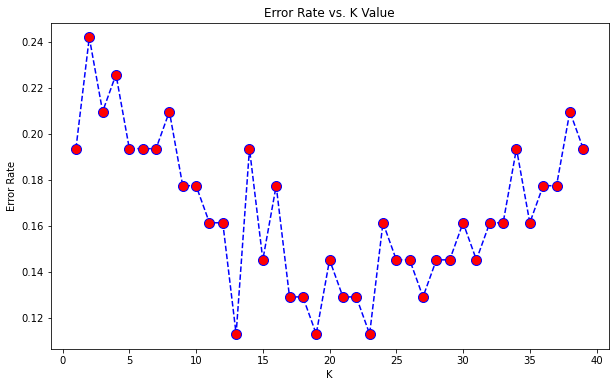

In [26]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[14  3]
 [ 9 36]]


              precision    recall  f1-score   support

           0       0.61      0.82      0.70        17
           1       0.92      0.80      0.86        45

    accuracy                           0.81        62
   macro avg       0.77      0.81      0.78        62
weighted avg       0.84      0.81      0.81        62



C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
#NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[12  5]
 [ 7 38]]


              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.88      0.84      0.86        45

    accuracy                           0.81        62
   macro avg       0.76      0.78      0.77        62
weighted avg       0.81      0.81      0.81        62



C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
